In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
%matplotlib inline


In [2]:
crypto = pd.read_csv("/content/crypto-markets.csv")

In [3]:
crypto['date'] = pd.to_datetime(crypto.date)

In [4]:
crypto.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [5]:
crypto['log_close'] = np.log(crypto.close)

crypto['log_volume'] = np.log(crypto.volume)

crypto['log_market'] = np.log(crypto.market)

crypto['spread'] = (crypto.high - crypto.low) / crypto.close

crypto['log_return'] = np.log(crypto.close / crypto.close.shift(1))

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
crypto.close.head()

0    134.21
1    144.54
2    139.00
3    116.99
4    105.21
Name: close, dtype: float64

In [7]:
crypto.close.shift(1).head()

0       NaN
1    134.21
2    144.54
3    139.00
4    116.99
Name: close, dtype: float64

In [8]:
crypto = crypto.replace([np.inf,-np.inf, np.nan], 0)

In [9]:
crypto.head(10)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,0.028910,4.899406,0.0,21.121080,0.000000
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,0.093331,4.973556,0.0,21.195622,0.074151
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,0.092662,4.934474,0.0,21.156873,-0.039082
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,0.274981,4.762088,0.0,20.984826,-0.172385
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,0.316700,4.655958,0.0,20.879002,-0.106130
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.085995e+09,0.6424,0.296982,4.582413,0.0,20.805763,-0.073545
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.250317e+09,0.8889,0.200000,4.722953,0.0,20.946663,0.140540
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.288693e+09,0.7521,0.100595,4.752814,0.0,20.976894,0.029861
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.249023e+09,0.3141,0.160463,4.721174,0.0,20.945628,-0.031640
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.240594e+09,0.8767,0.141166,4.714025,0.0,20.938856,-0.007149


In [10]:
birth_time = pd.DataFrame(crypto.slug.value_counts())
birth_time['survival_time'] = birth_time.slug
birth_time['slug'] = birth_time.index
birth_time.head()


,slug,survival_time
bitcoin,bitcoin,2042
litecoin,litecoin,2042
namecoin,namecoin,2042
novacoin,novacoin,2041
peercoin,peercoin,2041


In [11]:
crypto = pd.merge(crypto, birth_time, how='inner', left_on = 'slug', right_on = 'slug')

In [12]:
crypto.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return,survival_time
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,942297.000000,942297.000000,942297.000000,942297.000000,942297.000000,942297.000000
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,0.657106,-3.843110,8.385009,12.063038,0.000005,924.868466
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,343.339107,3.811215,4.406757,5.428543,0.313465,588.180332
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000,-22.332704,0.000000,0.000000,-17.046710,2.000000
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.086405,-6.068778,5.164786,10.294888,-0.065305,396.000000
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.157065,-3.734212,8.361241,13.166947,-0.002853,796.000000
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,0.284765,-1.487512,11.687635,15.743351,0.050774,1509.000000
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,332513.795858,14.648741,23.894668,26.511703,21.918794,2042.000000


In [13]:
crypto2017 = crypto[crypto.date.dt.year >= 2017]

In [14]:
crypto2017 = crypto2017[crypto2017['market'] > 0]

In [15]:
crypto_mean = pd.DataFrame(crypto2017.groupby('slug').mean())


In [16]:
crypto2017.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return,survival_time
count,595238.000000,5.952380e+05,5.952380e+05,5.952380e+05,5.952380e+05,5.952380e+05,5.952380e+05,595238.000000,595238.000000,595238.000000,595238.000000,595238.000000,595238.000000,595238.000000
mean,902.305333,4.658370e+02,5.445852e+02,4.007423e+02,4.639630e+02,1.347123e+07,2.577568e+08,0.467447,0.248625,-3.020493,9.517809,14.672578,-0.002463,776.299779
std,543.206972,1.578348e+04,1.930277e+04,1.324945e+04,1.572415e+04,2.312951e+08,4.485329e+09,0.316437,3.771033,3.384964,4.177720,2.816939,0.211420,528.704725
min,1.000000,1.100000e-08,2.400000e-08,5.700000e-09,1.100000e-08,0.000000e+00,3.000000e+00,0.000000,0.000000,-18.325371,0.000000,1.098612,-10.112565,9.000000
25%,403.000000,6.776000e-03,7.601000e-03,6.055000e-03,6.750250e-03,6.990000e+02,3.278428e+05,0.183400,0.089195,-4.998176,6.549651,12.700289,-0.065228,369.000000
50%,915.000000,4.889850e-02,5.420100e-02,4.397100e-02,4.871600e-02,1.650700e+04,2.661575e+06,0.444900,0.155348,-3.021748,9.711540,14.794429,-0.004157,565.000000
75%,1402.000000,3.701320e-01,4.079625e-01,3.352648e-01,3.691550e-01,2.843362e+05,1.561490e+07,0.742100,0.270866,-0.996539,12.557913,16.563736,0.051087,1176.000000
max,2039.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,2430.985612,14.648741,23.894668,26.511703,15.185294,2042.000000


In [17]:
crypto_2017_log_return = crypto2017.groupby('slug').log_return

ret_mean = pd.DataFrame(crypto_2017_log_return.mean())
ret_std = pd.DataFrame(crypto_2017_log_return.std())
ret_skew = pd.DataFrame(crypto_2017_log_return.skew())
ret_kurt = pd.DataFrame(crypto_2017_log_return.apply(pd.DataFrame.kurt))

ret_mean.columns = ['mean']
ret_std.columns = ['std']
ret_skew.columns = ['skew']
ret_kurt.columns = ['kurt']

df = pd.merge(crypto_mean, ret_mean, on = 'slug')
df = pd.merge(df, ret_std, on = 'slug')
df = pd.merge(df, ret_skew, on = 'slug')
df = pd.merge(df, ret_kurt, on = 'slug')
df.dropna(inplace = True)

In [18]:
df.sort_values('ranknow').head()

,ranknow,open,high,low,close,volume,market,close_ratio,spread,log_close,log_volume,log_market,log_return,survival_time,mean,std,skew,kurt
slug,,,,,,,,,,,,,,,,,,
bitcoin,1.0,5879.437479,6063.117980,5670.512206,5883.713438,4.166287e+09,9.937140e+10,0.560631,0.059213,8.404334,21.547487,25.037688,0.002136,2042.0,0.002136,0.046586,-0.127863,3.088802
ripple,2.0,0.438744,0.464717,0.411817,0.439343,5.504764e+08,1.714795e+10,0.493710,0.098064,-1.523831,18.788558,22.854042,0.005838,1944.0,0.005838,0.094677,2.543051,26.824691
ethereum,3.0,364.897579,379.184570,348.321017,364.924470,1.472782e+09,3.563600e+10,0.534083,0.079504,5.416638,20.420479,23.797372,0.003855,1211.0,0.003855,0.064230,0.287972,3.598397
stellar,4.0,0.160354,0.169826,0.150213,0.160550,6.672434e+07,2.916303e+09,0.499450,0.125605,-2.850370,16.646575,20.518061,0.006021,1578.0,0.006021,0.099679,1.742224,11.438352
bitcoin-cash,5.0,931.378230,988.645288,873.769239,930.856481,7.681712e+08,1.582737e+10,0.472779,0.112429,6.648604,20.082223,23.298961,-0.001002,495.0,-0.001002,0.092247,0.471956,5.545678


In [19]:
df100 = df[df.ranknow <= 100][['close_ratio', 'spread', 'log_market', 'log_volume', 'log_close', 'survival_time', 
                               'mean','std', 'skew', 'kurt']]

In [20]:
from sklearn.preprocessing import scale
data = scale(df100)
type(data)

numpy.ndarray

In [21]:
data.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

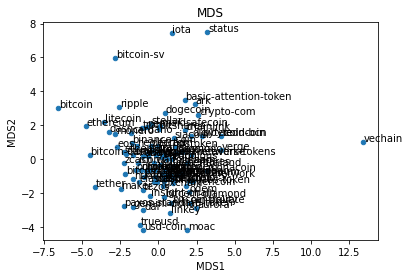

In [22]:
import sklearn.manifold as skm
X = skm.MDS(n_components=2).fit_transform(data)
plt.scatter(X[:,0],X[:,1],s=20)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(df100.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)